In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import mxnet as mx 

In [2]:
def decodeBox(yolobox, size, dscale):
    i, j, x, y, w, h = yolobox
    cxt = j*dscale + x*dscale
    cyt = i*dscale + y*dscale
    wt = w*size
    ht = h*size
    return [cxt, cyt, wt, ht]

def bboxdraw(img, label, dscale=32):
    assert label.shape == (7,7,5)
    size = img.shape[1]
    ilist, jlist = np.where(label[:,:,0]==1)
    
    # Create figure and axes
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    for i,j in zip(ilist, jlist): 
        cx,cy,w,h = label[i,j,1:]
        cxt, cyt, wt ,ht = decodeBox([i, j, cx,cy,w,h], size, dscale)
        # Create a Rectangle patch
        rect = patches.Rectangle((cxt-wt/2,cyt-ht/2), wt,ht,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()

In [41]:
data = mx.io.ImageRecordIter(path_imgrec='DATA_rec/cat_small.rec',
                             data_shape=(3,224,224),
                             label_width=7*7*5, 
                             batch_size=1,)

In [42]:
num=3
data.reset()
for i in range(num):
    batch = data.next()

In [43]:
c=0
data.reset()
batch = data.next()
while batch is not None:
    batch = data.next()
    c=c+1

StopIteration: 

In [44]:
c

9

In [45]:
batch.data

[
 [[[[  0.   0.   0. ...   1.   0.   0.]
    [  1.   2.   0. ...   0.   1.   0.]
    [  2.   1.   0. ...   0.   1.   0.]
    ...
    [166. 169. 172. ... 110. 112. 112.]
    [165. 174. 172. ... 110. 112. 110.]
    [165. 167. 166. ... 111. 112. 112.]]
 
   [[  0.   0.   0. ...   0.   0.   0.]
    [  1.   2.   0. ...   0.   0.   0.]
    [  2.   1.   0. ...   0.   0.   0.]
    ...
    [149. 152. 155. ...  86.  88.  88.]
    [148. 157. 155. ...  86.  89.  86.]
    [148. 150. 149. ...  87.  89.  85.]]
 
   [[  0.   0.   0. ...   0.   0.   2.]
    [  1.   2.   0. ...   0.   0.   2.]
    [  2.   1.   0. ...   0.   0.   2.]
    ...
    [121. 124. 127. ...  74.  76.  76.]
    [120. 129. 127. ...  74.  75.  74.]
    [120. 122. 121. ...  75.  75.  74.]]]]
 <NDArray 1x3x224x224 @cpu_pinned(0)>]

In [46]:
batch.label #7*7*5

[
 [[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.      

In [47]:
img = batch.data[0].asnumpy()[0]
label = batch.label[0].asnumpy().reshape((7,7,5))

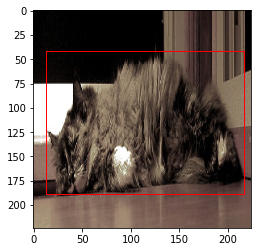

In [48]:
img4show = np.uint8(img.transpose((1,2,0)))
bboxdraw(img4show, label)